# BTC 2020

import Libraries

In [1]:

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize  

import requests

# import k-means from clustering stage
from sklearn.cluster import KMeans

# find the distances
from scipy.spatial.distance import cdist

print('Libraries imported.')

Libraries imported.


Load data to dataframe

In [2]:
# http://chiangmai.old.nso.go.th/nso/project/search/result_by_department.jsp

url ="https://raw.githubusercontent.com/tutalae/BTC/main/BTC2020"

df = pd.read_csv(url)

print(df.head())

         Date         Open         High          Low        Close  \
0  2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316   
1  2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215   
2  2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277   
3  2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738   
4  2020-01-05  7410.451660  7544.497070  7400.535645  7411.317383   

        Volume     Last      Bid      Ask  Dif Bid Ask  
0  18565664996  7168.36  7164.40  7170.96         6.56  
1  20802083465  7178.68  7172.68  7178.42         5.74  
2  28111481031  6945.70  6944.67  6949.09         4.42  
3  18444271274  7332.59  7332.59  7338.91         6.32  
4  19725074094  7344.48  7344.48  7350.67         6.19  


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Last', 'Bid', 'Ask',
       'Dif Bid Ask'],
      dtype='object')

In [4]:
df.describe()

,Open,High,Low,Close,Volume,Last,Bid,Ask,Dif Bid Ask
count,365.000000,365.000000,365.000000,365.000000,3.650000e+02,363.000000,363.000000,363.000000,363.000000
mean,11008.168147,11255.564088,10797.672548,11067.655811,3.185694e+10,11033.943140,11030.716501,11037.390992,6.674490
std,4108.070440,4271.454278,4027.955139,4208.325667,1.136806e+10,4111.672025,4110.539357,4112.012403,3.752442
min,5002.578125,5331.833984,4106.980957,4970.788086,1.225260e+10,4929.160000,4929.370000,4937.750000,0.010000
25%,8865.387695,9033.470703,8704.990234,8869.669922,2.301754e+10,8894.250000,8892.425000,8896.895000,4.225000
50%,9691.230469,9836.369141,9539.818359,9700.414062,3.113396e+10,9711.140000,9710.260000,9717.890000,5.990000
75%,11662.256836,11796.396484,11408.593750,11675.739258,3.932616e+10,11648.870000,11648.870000,11657.255000,8.495000
max,27360.089844,28937.740234,27360.089844,28840.953125,7.415677e+10,27392.360000,27369.480000,27392.360000,23.010000


In [5]:
vol25 = 2.301754e+10
vol75 = 3.932616e+10
High25 = 9033.470703
High75 = 11796.396484
Low25 = 8704.990234
Low75 = 11408.593750
Dif25 = 4.225000
Dif75 = 4.225000

# Max Volume day

In [6]:
df[df["Volume"] == df["Volume"].max()]

,Date,Open,High,Low,Close,Volume,Last,Bid,Ask,Dif Bid Ask
72,2020-03-13,5017.831055,5838.114746,4106.980957,5563.707031,74156772074,5686.34,5672.07,5686.34,14.27


because COVID outbreak

“Bitcoin’s recent price action is primarily a result of the coronavirus outbreak affecting global markets and driving investors towards the safety of cash,” said Joe DiPasquale, CEO of crypto investment firm BitBull Capital. “With this sharp decline, Bitcoin’s potential as a safe-haven asset is being questioned, but we believe it is too early to seek any correlations between Bitcoin and other asset classes.” 

The bitcoin nosedive came amidst volatile trading on Wall Street this week. On Thursday, stocks saw their worst since the “Black Monday” market crash in 1987. Stocks rose sharply Friday afternoon on the possibility of fiscal stimulus from governments around the world.

Other cryptocurrencies also dropped this week. The world second largest digital currency, ethereum, fell 46% this week while XRP lost nearly 40% of its value.

from https://www.cnbc.com/2020/03/13/bitcoin-loses-half-of-its-value-in-two-day-plunge.html

In [7]:
df[df["Low"] == df["Low"].min()]

,Date,Open,High,Low,Close,Volume,Last,Bid,Ask,Dif Bid Ask
72,2020-03-13,5017.831055,5838.114746,4106.980957,5563.707031,74156772074,5686.34,5672.07,5686.34,14.27


# the highest price day

In [8]:
df[df["High"] == df["High"].max()]

,Date,Open,High,Low,Close,Volume,Last,Bid,Ask,Dif Bid Ask
364,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,51287442704,27392.36,27369.48,27392.36,22.88


because retail start interest in Bitcoin

“While a growing institutional presence has been part of the narrative of the current bull run, we may see increased retail interest in Bitcoin as a form of digital gold,” Paolo Ardoino, chief technology officer of crypto exchange Bitfinex said in an email.

https://www.bloomberg.com/news/articles/2020-12-30/bitcoin-hits-new-record-set-for-biggest-monthly-gain-since-2019

In [9]:
###
# ax = df.sort_values(by="Volume", ascending=False).plot(x="Close", y="Dif Bid Ask", kind="bar", figsize = (9,15))
# ax.set_ylabel("Volume")
###

In [10]:
df2 = df.drop('Date',1 )
df2.head()

,Open,High,Low,Close,Volume,Last,Bid,Ask,Dif Bid Ask
0,7194.892090,7254.330566,7174.944336,7200.174316,18565664996,7168.36,7164.40,7170.96,6.56
1,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,7178.68,7172.68,7178.42,5.74
2,6984.428711,7413.715332,6914.996094,7344.884277,28111481031,6945.70,6944.67,6949.09,4.42
3,7345.375488,7427.385742,7309.514160,7410.656738,18444271274,7332.59,7332.59,7338.91,6.32
4,7410.451660,7544.497070,7400.535645,7411.317383,19725074094,7344.48,7344.48,7350.67,6.19


# Normalize data

In [11]:
from sklearn.preprocessing import StandardScaler
X = df2.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.93802384, -0.90063095, -0.92026868, ..., -0.91184558,
        -0.91152904, -0.02067152],
       [-0.94791115, -0.96021536, -0.97135761, ..., -0.90986179,
        -0.90974236, -0.23821678],
       [-0.90065869, -0.96525557, -0.88583489, ..., -0.96449047,
        -0.96466711, -0.58841158],
       ...,
       [ 3.78224662,  3.8310062 ,  3.81128756, ...,  3.65601446,
         3.65859158,  4.34349851],
       [ 3.77793524,  3.77622797,  3.87734947, ...,  3.84834453,
         3.84662136, -0.34168342],
       [ 4.14529737,  4.11751166,  4.22916282, ...,  3.92906925,
         3.93151486,  4.30900963]])

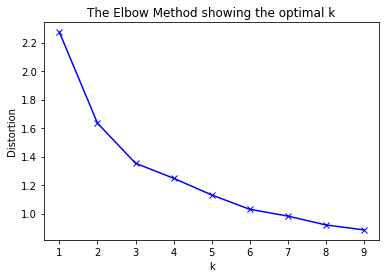

In [12]:
# try with 10 different values of k to find the best one
Ks = 10
distortions = []

df_clustering = Clus_dataSet

for k in range(1, Ks):

    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_clustering)

    # find the distortion w.r.t each k
    distortions.append(
        sum(np.min(cdist(df_clustering, kmeans.cluster_centers_, 'euclidean'), axis=1))
        / df_clustering.shape[0]
    )

plt.plot(range(1, Ks), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We see that, the "elbow" appears at k=3.

However, but I want to use 4.

In [13]:
nclusters = 4
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(df_clustering)

In [14]:
#Let's create a new dataframe look like df but contains the cluster labels for each one.

In [15]:
df_btc = df.copy()
df_btc["Cluster Labels"] = kmeans.labels_

# sort the table by cluster labels
df_btc.sort_values(["Cluster Labels"], inplace=True)

df_btc

,Date,Open,High,Low,Close,Volume,Last,Bid,Ask,Dif Bid Ask,Cluster Labels
310,2020-11-06,15579.729492,15903.437500,15226.839844,15565.880859,39837841971,15605.04,15603.49,15608.32,4.83,0
348,2020-12-14,19144.492188,19305.099609,19012.708984,19246.644531,22473997681,19162.36,19151.82,19156.95,5.13,0
347,2020-12-13,18806.765625,19381.535156,18734.332031,19142.382812,25450468637,18806.83,18805.73,18815.49,9.76,0
346,2020-12-12,18051.320312,18919.550781,18046.041016,18803.656250,21752580802,18039.38,18030.38,18041.31,10.93,0
328,2020-11-24,18365.015625,19348.271484,18128.656250,19107.464844,51469565008,18386.92,18382.19,18386.92,4.73,0
329,2020-11-25,19104.410156,19390.964844,18581.146484,18732.121094,43710357371,19160.85,19166.91,19179.20,12.29,0
345,2020-12-11,18263.929688,18268.453125,17619.533203,18058.904297,27919640985,18257.45,18253.78,18257.45,3.67,0
330,2020-11-26,18729.839844,18866.285156,16351.035156,17150.623047,61396835736,18727.26,18715.21,18724.46,9.25,0
344,2020-12-10,18553.298828,18553.298828,17957.064453,18264.992188,25547132265,18546.34,18542.85,18552.49,9.64,0
332,2020-11-28,17112.933594,17853.939453,16910.652344,17717.414062,32601040733,17154.39,17146.55,17156.24,9.69,0


In [16]:
df_btc_mean=df_btc.groupby('Cluster Labels').mean()
df_btc_mean

,Open,High,Low,Close,Volume,Last,Bid,Ask,Dif Bid Ask
Cluster Labels,,,,,,,,,
0,17063.388094,17521.239955,16686.431501,17234.960738,3.483989e+10,17095.056939,17090.794286,17099.284898,8.490612
1,8221.460640,8427.193661,8010.233263,8222.543981,4.066753e+10,8202.612727,8198.621157,8206.267603,7.646446
2,24283.795201,25302.433873,23803.075056,24822.569894,4.806004e+10,24287.271429,24277.447857,24292.194286,14.746429
3,10227.165170,10385.258323,10083.874828,10258.616797,2.371888e+10,10252.098492,10250.188492,10255.077486,4.888994


# Cluster

cluster 0 = price high, volume fair

cluster 1 = price low, volume fair

cluster 2 = price very high, volume very high, high spread

cluster 3 = price medium, volume very low, very low spread

In [17]:
btc_0 = df_btc[df_btc["Cluster Labels"] == 0]
btc_0["Open"] = btc_0["Open"].astype(int)
btc_0

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Date,Open,High,Low,Close,Volume,Last,Bid,Ask,Dif Bid Ask,Cluster Labels
310,2020-11-06,15579,15903.437500,15226.839844,15565.880859,39837841971,15605.04,15603.49,15608.32,4.83,0
348,2020-12-14,19144,19305.099609,19012.708984,19246.644531,22473997681,19162.36,19151.82,19156.95,5.13,0
347,2020-12-13,18806,19381.535156,18734.332031,19142.382812,25450468637,18806.83,18805.73,18815.49,9.76,0
346,2020-12-12,18051,18919.550781,18046.041016,18803.656250,21752580802,18039.38,18030.38,18041.31,10.93,0
328,2020-11-24,18365,19348.271484,18128.656250,19107.464844,51469565008,18386.92,18382.19,18386.92,4.73,0
329,2020-11-25,19104,19390.964844,18581.146484,18732.121094,43710357371,19160.85,19166.91,19179.20,12.29,0
345,2020-12-11,18263,18268.453125,17619.533203,18058.904297,27919640985,18257.45,18253.78,18257.45,3.67,0
330,2020-11-26,18729,18866.285156,16351.035156,17150.623047,61396835736,18727.26,18715.21,18724.46,9.25,0
344,2020-12-10,18553,18553.298828,17957.064453,18264.992188,25547132265,18546.34,18542.85,18552.49,9.64,0
332,2020-11-28,17112,17853.939453,16910.652344,17717.414062,32601040733,17154.39,17146.55,17156.24,9.69,0


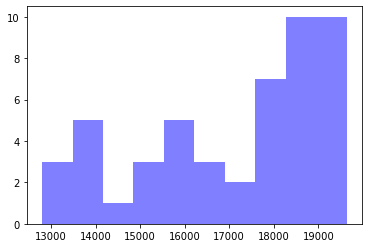

In [18]:
x0 = btc_0["Open"]
num_bins = 10
n, bins, patches = plt.hist(x0, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [19]:
btc_1 = df_btc[df_btc["Cluster Labels"] == 1]
btc_1["Open"] = btc_1["Open"].astype(int)
btc_1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Date,Open,High,Low,Close,Volume,Last,Bid,Ask,Dif Bid Ask,Cluster Labels
111,2020-04-21,6879,6934.551758,6834.442383,6880.323242,32589741510,6906.41,6901.07,6906.39,5.32,1
112,2020-04-22,6879,7145.865723,6867.781738,7117.207520,33249153865,7119.57,7119.57,7122.22,2.65,1
114,2020-04-24,7434,7574.195801,7434.181641,7550.900879,34636526285,7489.47,7488.66,7496.52,7.86,1
115,2020-04-25,7550,7641.363770,7521.672363,7569.936035,32941541446,NaN,NaN,NaN,NaN,1
116,2020-04-26,7570,7700.594238,7561.407715,7679.867188,33070154490,7619.69,7618.93,7625.17,6.24,1
117,2020-04-27,7679,7795.601074,7679.418945,7795.601074,36162144724,7776.55,7777.32,7784.51,7.19,1
118,2020-04-28,7796,7814.527344,7730.806641,7807.058594,33187959920,7762.78,7761.90,7766.55,4.65,1
113,2020-04-23,7121,7491.785156,7081.594727,7429.724609,43500782316,7573.15,7571.15,7574.60,3.45,1
110,2020-04-20,7186,7240.290527,6835.502930,6881.958496,37747113935,6890.08,6886.02,6890.08,4.06,1
105,2020-04-15,6845,6928.664551,6633.402832,6642.109863,32288311030,6715.03,6712.14,6716.14,4.00,1


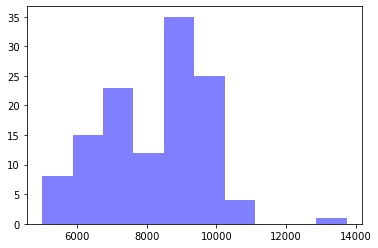

In [20]:
x1 = btc_1["Open"]
num_bins = 10
n, bins, patches = plt.hist(x1, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [21]:
btc_2 = df_btc[df_btc["Cluster Labels"] == 2]
btc_2["Open"] = btc_2["Open"].astype(int)
btc_2

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Date,Open,High,Low,Close,Volume,Last,Bid,Ask,Dif Bid Ask,Cluster Labels
363,2020-12-29,27081,27370.720703,25987.298828,27362.437500,45265946774,27037.90,27032.55,27037.90,5.35,2
364,2020-12-30,27360,28937.740234,27360.089844,28840.953125,51287442704,27392.36,27369.48,27392.36,22.88,2
351,2020-12-17,21308,23642.660156,21234.675781,22805.162109,71378606374,21358.96,21352.33,21367.19,14.86,2
360,2020-12-26,24677,26718.070312,24522.689453,26437.037109,48332647295,24714.01,24695.30,24718.17,22.87,2
359,2020-12-25,23733,24710.101562,23463.673828,24664.791016,42068395846,23726.28,23723.55,23740.21,16.66,2
362,2020-12-28,26280,27389.111328,26207.640625,27084.808594,49056742893,26242.81,26229.80,26252.81,23.01,2
358,2020-12-24,23240,23768.337891,22777.597656,23735.949219,41080759713,23247.71,23213.14,23231.69,18.55,2
357,2020-12-23,23781,24024.490234,22802.646484,23241.345703,51146161904,23835.10,23815.37,23829.88,14.51,2
361,2020-12-27,26439,28288.839844,25922.769531,26272.294922,66479895605,26472.89,26459.66,26479.49,19.83,2
355,2020-12-21,23474,24059.982422,22159.367188,22803.082031,45852713981,23470.85,23470.00,23479.31,9.31,2


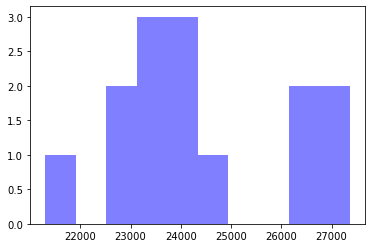

In [22]:
x2 = btc_2["Open"]
num_bins = 10
n, bins, patches = plt.hist(x2, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [23]:
btc_3 = df_btc[df_btc["Cluster Labels"] == 3]
btc_3["Open"] = btc_3["Open"].astype(int)
btc_3

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Date,Open,High,Low,Close,Volume,Last,Bid,Ask,Dif Bid Ask,Cluster Labels
244,2020-09-01,11679,12067.081055,11601.128906,11970.478516,27311555343,11974.39,11973.55,11981.78,8.23,3
261,2020-09-18,10951,11034.908203,10829.657227,10944.585938,26341903912,10933.85,10933.86,10940.11,6.25,3
262,2020-09-19,10933,11134.092773,10909.618164,11094.346680,22764204007,11066.19,11062.39,11066.19,3.80,3
263,2020-09-20,11095,11095.870117,10814.477539,10938.271484,24699523787,10878.50,10876.88,10878.50,1.62,3
265,2020-09-22,10459,10568.077148,10382.726562,10538.459961,23621787803,10511.75,10505.19,10512.89,7.70,3
260,2020-09-17,10973,11037.420898,10774.627930,10948.990234,38151810523,10921.72,10921.70,10927.34,5.64,3
266,2020-09-23,10539,10637.847656,10185.774414,10225.864258,22986733996,10263.58,10263.16,10267.89,4.73,3
267,2020-09-24,10227,10765.794922,10215.205078,10745.548828,23017536741,10770.00,10765.83,10770.00,4.17,3
268,2020-09-25,10747,10757.548828,10594.047852,10702.290039,21232549821,10689.60,10689.60,10693.53,3.93,3
269,2020-09-26,10702,10778.500000,10682.082031,10754.437500,18105012128,10735.00,10735.00,10736.05,1.05,3


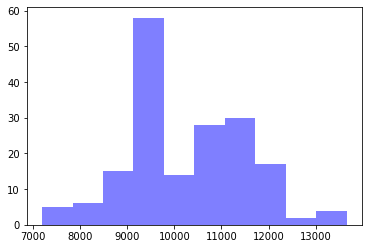

In [24]:
x3 = btc_3["Open"]
num_bins = 10
n, bins, patches = plt.hist(x3, num_bins, facecolor='blue', alpha=0.5)
plt.show()